# Data Analysis of Tattoo Studio Locations in South Africa

In [27]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Overview of Dataset

In [28]:
database = pd.read_csv("cleaned_tattoo_studios.csv")

In [29]:
database.shape

(594, 15)

In [30]:
database.columns

Index(['Title', 'rating', 'reviewCount', 'website', 'phoneNumber', 'address',
       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday', 'latitude', 'longitude'],
      dtype='object')

## Country-Wide Co-Ordinates

In [31]:
coordinates = database[["latitude", "longitude"]].dropna()

[Text(0, 0.5, 'Latitude'),
 Text(0.5, 0, 'Longitude'),
 Text(0.5, 1.0, 'South Africa')]

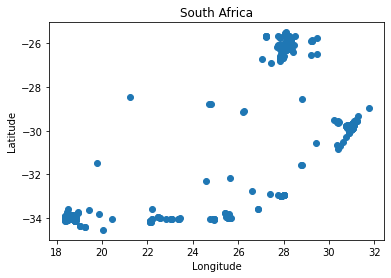

In [32]:
fig, ax = plt.subplots()
longitude_x = coordinates["longitude"]
latitude_y = coordinates["latitude"]
ax.scatter(longitude_x, latitude_y)
ax.set(ylabel="Latitude", xlabel="Longitude", title="South Africa")

### K-Means Clustering Analysis

#### Elbows

[Text(0.5, 1.0, 'Elbow'),
 Text(0.5, 0, 'Number of Clusters'),
 Text(0, 0.5, 'Inertia')]

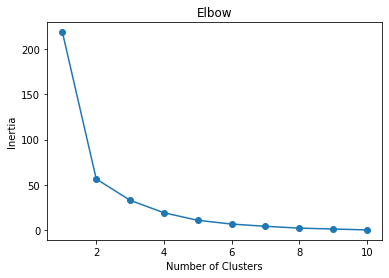

In [39]:
#longitude_x, latitude_y = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12], [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(longitude_x, latitude_y))
inertias = []

for data_point in range (1, len(data)+ 1):
    kmeans = KMeans(n_clusters=data_point)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)


fig, ax = plt.subplots()
ax.plot(range(1, len(data)+1), inertias, marker="o")
ax.set(title="Elbow", xlabel="Number of Clusters", ylabel="Inertia")

#### Clusters

[Text(0, 0.5, 'Latitude'),
 Text(0.5, 0, 'Longitude'),
 Text(0.5, 1.0, 'Clusters')]

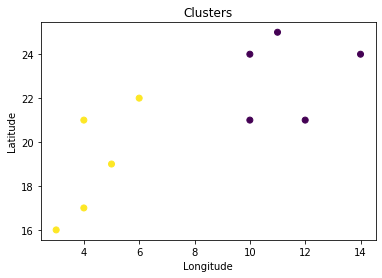

In [38]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

fig, ax = plt.subplots()
ax.scatter(longitude_x, latitude_y, c=kmeans.labels_)
ax.set(ylabel="Latitude", xlabel="Longitude", title="Clusters")

## Studios in Cape Town

[Text(0, 0.5, 'Latitude'),
 Text(0.5, 0, 'Longitude'),
 Text(0.5, 1.0, 'Cape Town')]

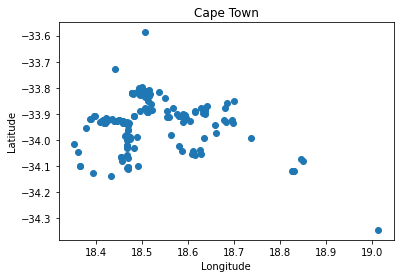

In [ ]:
cape_town = database[database["address"].str.contains("Cape Town")]

fig, ax = plt.subplots()
longitude_x = cape_town["longitude"]
latitude_y = cape_town["latitude"]
ax.scatter(longitude_x, latitude_y)
ax.set(ylabel="Latitude", xlabel="Longitude", title="Cape Town")

## Studios in Johannesburg

[Text(0, 0.5, 'Latitude'),
 Text(0.5, 0, 'Longitude'),
 Text(0.5, 1.0, 'Johannesburg')]

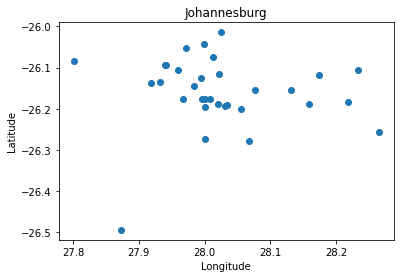

In [ ]:
johannesburg = database[database["address"].str.contains("Johannesburg")]

fig, ax = plt.subplots()
longitude_x = johannesburg["longitude"]
latitude_y = johannesburg["latitude"]
ax.scatter(longitude_x, latitude_y)
ax.set(ylabel="Latitude", xlabel="Longitude", title="Johannesburg")

## Studios in Durban

[Text(0, 0.5, 'Latitude'), Text(0.5, 0, 'Longitude'), Text(0.5, 1.0, 'Durban')]

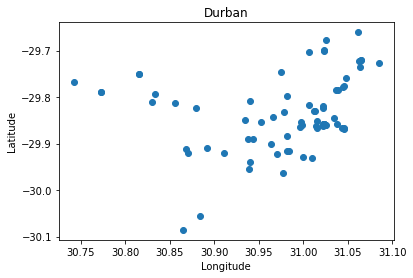

In [ ]:
durban = database[database["address"].str.contains("Durban")]
durban = durban[durban["longitude"] > 30.5] #filter outliers

fig, ax = plt.subplots()
longitude_x = durban["longitude"]
latitude_y = durban["latitude"]
ax.scatter(longitude_x, latitude_y)
ax.set(ylabel="Latitude", xlabel="Longitude", title="Durban")